In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load dataset
data = load_wine()
X, y = data.data, data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [3]:
# Base Model: Decision Tree (weak learner)
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=42)

# Bagging Classifier with multiple decision trees
bagging_model = BaggingClassifier(base_estimator=base_estimator, 
                                  n_estimators=50,   # Number of base estimators
                                  max_samples=0.8,   # Sample fraction for each model
                                  bootstrap=True,    # Sampling with replacement
                                  random_state=42)

# Train the bagging model
bagging_model.fit(X_train, y_train)

# Predictions
y_pred = bagging_model.predict(X_test)


C:\Users\sunny\.conda\envs\torch_env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [4]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Bagging Classifier Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [5]:
# Train a single Decision Tree
single_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
single_tree.fit(X_train, y_train)

# Predictions
y_pred_single = single_tree.predict(X_test)

# Accuracy
single_tree_accuracy = accuracy_score(y_test, y_pred_single)
print(f"Single Decision Tree Accuracy: {single_tree_accuracy:.4f}")


Single Decision Tree Accuracy: 0.9630


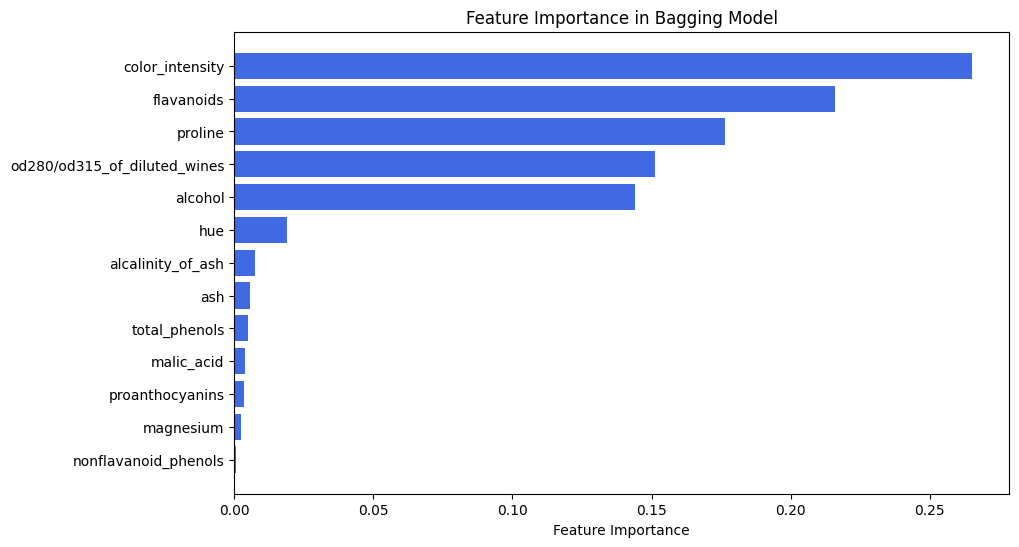

In [6]:
# Extract feature importance from a single Decision Tree in Bagging
feature_importances = np.mean([tree.feature_importances_ for tree in bagging_model.estimators_], axis=0)

# Sort by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(np.array(data.feature_names)[sorted_idx], feature_importances[sorted_idx], color="royalblue")
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Bagging Model")
plt.gca().invert_yaxis()
plt.show()


In [7]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'bootstrap': [True, False]
}

# Grid search
grid_search = GridSearchCV(BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3)), 
                           param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_model = grid_search.best_estimator_
best_predictions = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, best_predictions)
print(f"Best Bagging Model Accuracy: {best_accuracy:.4f}")


Best Parameters: {'bootstrap': True, 'max_samples': 0.5, 'n_estimators': 50}
Best Bagging Model Accuracy: 1.0000


C:\Users\sunny\.conda\envs\torch_env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
